# Script Web Scrapping

In [ ]:
import requests as rq
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import math
from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
# import requests as rq
# import json
# import pandas as pd

# def web_scraping_csv():
#   user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
#   headers = {'User-Agent': user_agent}
#   total_amount_items = 50000
#   amout_items_per_page = 100
#   pages = 102 # change this value
#   init_page = pages
#   dfs = {}
#   for i in range(1, int(total_amount_items / amout_items_per_page) + 1):
#     url = 'https://www.zapimoveis.com.br/venda/?pagina=' + str(pages) + '&tipo=Imóvel%20usado&transacao=Venda'
#     response = rq.get(url,headers=headers)
#     response_status = response.status_code
#     if response_status == 200:
#       data = response.text
#       data = str(data)

#       data = data.split('"results":{"listings":[',1)[1]
#       data = data.split('],"nearbyListings":[]',1)[0]
#       data = data.split(',"type":"nearby"}]',1)[0]

#       if data[-2:] == '}}':
#         data_formated = '{"listings":[' + data + ']}'
#       elif data[-10:] == '"premium"}':
#         data = data.split(',"type":"premium"}',1)[0]
#         data_formated = '{"listings":[' + data + '}]}'
#       else:
#         data_formated = '{"listings":[' + data + '}]}'

#       data_formated = data_formated.replace('R$ ','')
#       data_formated = data_formated.replace(',"superPremiumListings":[}]}','}')
#       data_formated = data_formated.split(';(function',1)[0]
#       data_formated = data_formated.split(',"advertisers"',1)[0]

#       data_formated_json = json.loads(data_formated)

#       df = pd.json_normalize(data_formated_json['listings'])

#       # df = df[['type', 'account.name', 'link.data.state', 'link.data.city', 'link.data.zone', 'link.name','listing.usableAreas',
#       #          'listing.totalAreas','listing.title','listing.description','listing.floors','listing.parkingSpaces','listing.suites',
#       #          'listing.bathrooms','listing.bedrooms','listing.pricingInfo.salePrice','listing.pricingInfo.yearlyIptu',
#       #          'listing.pricingInfo.monthlyCondoFee','listing.publicationType','listing.unitTypes','listing.unitSubTypes',
#       #          'listing.usageTypes','listing.amenities']]

#       df['listing.pool'] = df['listing.amenities'].map(lambda x: 'True' if 'POOL' in x else 'False')
#       df['listing.sauna'] = df['listing.amenities'].map(lambda x: 'True' if 'SAUNA' in x else 'False')
#       df['listing.backyard'] = df['listing.amenities'].map(lambda x: 'True' if 'BACKYARD' in x else 'False')
#       df['listing.garden'] = df['listing.amenities'].map(lambda x: 'True' if 'GARDEN' in x else 'False')
#       df['listing.barbgrill'] = df['listing.amenities'].map(lambda x: 'True' if 'BARBECUE_GRILL' in x else 'False')
#       df['listing.partyhall'] = df['listing.amenities'].map(lambda x: 'True' if 'PARTY_HALL' in x else 'False')
#       df['listing.tenniscourt'] = df['listing.amenities'].map(lambda x: 'True' if 'TENNIS_COURT' in x else 'False')
#       df['listing.sportcourt'] = df['listing.amenities'].map(lambda x: 'True' if 'SPORTS_COURT' in x else 'False')
#       df['listing.bathtub'] = df['listing.amenities'].map(lambda x: 'True' if 'BATHTUB' in x else 'False')
#       df['listing.soundproofing'] = df['listing.amenities'].map(lambda x: 'True' if 'SOUNDPROOFING' in x else 'False')
#       df['listing.fireplace'] = df['listing.amenities'].map(lambda x: 'True' if 'FIREPLACE' in x else 'False')
#       df['listing.gym'] = df['listing.amenities'].map(lambda x: 'True' if 'GYM' in x else 'False')
#       df['listing.hottub'] = df['listing.amenities'].map(lambda x: 'True' if 'HOT_TUB' in x else 'False')
#       df['listing.furnished'] = df['listing.amenities'].map(lambda x: 'True' if 'FURNISHED' in x else 'False')
#       df['listing.guestpark'] = df['listing.amenities'].map(lambda x: 'True' if 'GUEST_PARKING' in x else 'False')
#       df['listing.playground'] = df['listing.amenities'].map(lambda x: 'True' if 'PLAYGROUND' in x else 'False')
#       df['listing.mountainview'] = df['listing.amenities'].map(lambda x: 'True' if 'MOUNTAIN_VIEW' in x else 'False')

#       df['listing.floors'] = df['listing.floors'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.unitTypes'] = df['listing.unitTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.unitSubTypes'] = df['listing.unitSubTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.parkingSpaces'] = df['listing.parkingSpaces'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.suites'] = df['listing.suites'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.bathrooms'] = df['listing.bathrooms'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.usageTypes'] = df['listing.usageTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.totalAreas'] = df['listing.totalAreas'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.bedrooms'] = df['listing.bedrooms'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.usableAreas'] = df['listing.usableAreas'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.stamps'] = df['listing.stamps'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.address.pois'] = df['listing.address.pois'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.address.streetNumber'] = df['listing.address.streetNumber'].map(lambda x: '' if len(x) == 0 else x[0])
#       df['listing.videoTour'] = df['listing.videoTour'].map(lambda x: '' if len(x) == 0 else x[0])

#       df = df.drop(columns=['listing.amenities'])

#       dfs['df_' + str(i)] = df
#       pages += 1
#     else:
#       pages += 1
#       print('url: ', url)
#       print('\nstatus: ', response_status)
#       break
#   dfs_list = []
#   for key in dfs.keys():
#     dfs_list.append(dfs[key])
#   df_zap = pd.concat(dfs_list, sort=False)
#   df_zap.to_csv('data_zap_page_' + str(init_page) + '_to_' + str(pages - 1) + '.csv', sep=';', index=False)
#   print('\nArquivo criado!\n')

# web_scraping_csv()

In [ ]:
# BASE_URL = 'https://www.zapimoveis.com.br/venda/'

# def get_by_page(page, base_url = BASE_URL):
#   url = '{}?pagina={}&transacao=Venda'.format(base_url, page)
#   USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'

#   headers = {'User-Agent': USER_AGENT }
#   return req.get(url, headers=headers)

# def get_response(url):
#   USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
#   headers = {'User-Agent': USER_AGENT }
#   response = req.get(url, headers=headers)

#   return [response.status_code, response.text]

# def get_urls(begin, end, base_url = BASE_URL):
#   urls = []

#   for i in range(begin, end+1):
#     url = '{}?pagina={}&transacao=Venda'.format(base_url, i)
#     urls.append(url)

#   return urls

# def get_json(response):
#   data = response
#   data = str(data)
#   data = data.split('"results":{"listings":[',1)[1]
#   data = data.split('],"nearbyListings":[]',1)[0]
#   data = data.split(',"type":"nearby"}]',1)[0]

#   if data[-2:] == '}}':
#     data_formated = '{"listings":[' + data + ']}'
#   elif data[-10:] == '"premium"}':
#     data = data.split(',"type":"premium"}',1)[0]
#     data_formated = '{"listings":[' + data + '}]}'
#   else:
#     data_formated = '{"listings":[' + data + '}]}'

#   data_formated = data_formated.replace('R$ ','')
#   data_formated = data_formated.replace(',"superPremiumListings":[}]}','}')
#   data_formated = data_formated.split(';(function',1)[0]
#   data_formated = data_formated.split(',"advertisers"',1)[0]

#   data_formatted = json.loads(data_formated)

#   return data_formatted['listings']


# def get_dataframe(json):
#   dataframe = pd.json_normalize(json)

#   keys = ['type', 'account.name', 'link.data.state', 'link.data.city', 'link.data.zone', 'link.name','listing.usableAreas',
#       'listing.totalAreas','listing.title','listing.description','listing.floors','listing.parkingSpaces','listing.suites',
#       'listing.bathrooms','listing.bedrooms','listing.pricingInfo.salePrice','listing.pricingInfo.yearlyIptu',
#       'listing.pricingInfo.monthlyCondoFee','listing.publicationType','listing.unitTypes','listing.unitSubTypes',
#       'listing.usageTypes','listing.amenities', 'listing.videoTour', 'listing.address.streetNumber', 'listing.address.point.lon',
#       'listing.address.point.lat', 'listing.stamps', 'listing.address.pois']
#   dataframe = dataframe[keys]

#   dataframe['listing.pool'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'POOL' in x else 'False')
#   dataframe['listing.sauna'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'SAUNA' in x else 'False')
#   dataframe['listing.backyard'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'BACKYARD' in x else 'False')
#   dataframe['listing.garden'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'GARDEN' in x else 'False')
#   dataframe['listing.barbgrill'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'BARBECUE_GRILL' in x else 'False')
#   dataframe['listing.partyhall'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'PARTY_HALL' in x else 'False')
#   dataframe['listing.tenniscourt'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'TENNIS_COURT' in x else 'False')
#   dataframe['listing.sportcourt'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'SPORTS_COURT' in x else 'False')
#   dataframe['listing.bathtub'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'BATHTUB' in x else 'False')
#   dataframe['listing.soundproofing'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'SOUNDPROOFING' in x else 'False')
#   dataframe['listing.fireplace'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'FIREPLACE' in x else 'False')
#   dataframe['listing.gym'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'GYM' in x else 'False')
#   dataframe['listing.hottub'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'HOT_TUB' in x else 'False')
#   dataframe['listing.furnished'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'FURNISHED' in x else 'False')
#   dataframe['listing.guestpark'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'GUEST_PARKING' in x else 'False')
#   dataframe['listing.playground'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'PLAYGROUND' in x else 'False')
#   dataframe['listing.mountainview'] = dataframe['listing.amenities'].map(lambda x: 'True' if 'MOUNTAIN_VIEW' in x else 'False')

#   dataframe['listing.floors'] = dataframe['listing.floors'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.unitTypes'] = dataframe['listing.unitTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.unitSubTypes'] = dataframe['listing.unitSubTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.parkingSpaces'] = dataframe['listing.parkingSpaces'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.suites'] = dataframe['listing.suites'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.bathrooms'] = dataframe['listing.bathrooms'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.usageTypes'] = dataframe['listing.usageTypes'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.totalAreas'] = dataframe['listing.totalAreas'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.bedrooms'] = dataframe['listing.bedrooms'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.usableAreas'] = dataframe['listing.usableAreas'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.address.pois'] = dataframe['listing.address.pois'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.address.streetNumber'] = dataframe['listing.address.streetNumber'].map(lambda x: '' if len(x) == 0 else x[0])
#   dataframe['listing.videoTour'] = dataframe['listing.videoTour'].map(lambda x: '' if len(x) == 0 else x[0])

#   return dataframe

# response = get_by_page(1)

# def get_parsed_html(response):
#   if response.status_code != 200: return None

#   html = BeautifulSoup(response.text, 'html.parser')

#   return html

# parsed_html = get_parsed_html(response)

# def get_property_total(html):
#   if html is None: return 0

#   title = parsed_html.find(class_='summary__title')
#   total_str = title.strong.text.split()[0].replace('.', '')

#   return int(total_str)

# def get_total_of_pages(total):
#   return math.ceil(total / 100)

# TOTAL = get_property_total(parsed_html)
# TOTAL_OF_PAGES = get_total_of_pages(TOTAL)

# [TOTAL, TOTAL_OF_PAGES]

# def get_parallel_data(urls):
#   num_threads = 1000
#   executor = ThreadPoolExecutor(max_workers=num_threads)

#   responses = [executor.submit(get_response, url) for url in urls]

#   completed_responses = []

#   for response in as_completed(responses):
#     result = response.result()

#     completed_responses.append(result)

#   filtered_responses = filter(lambda x: x[0] == 200, completed_responses)
#   jsons = map(lambda x: x[1], filtered_responses)

#   return map(get_json, jsons)

# def get_data(urls):

#   dfs = []
#   for url in urls:
#     response = get_response(url)

#     if (response[0] == 200):
#       json = get_json(response[1])
#       df = get_dataframe(json)
#       dfs.append(df)

#   return dfs

# urls = get_urls(1, 2)
# dfs = get_data(urls)

# dfs_list = list(map(get_dataframe, dfs))

# df_zap = pd.concat(dfs_list, sort=False)
# df_zap.to_csv('data_zap.csv', sep=';', index=False)
# !cp data_zap.csv '/content/drive/MyDrive/colab-notebooks'

# Pre-processamento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/dataZAP.csv', engine='python', sep=";", error_bad_lines=False)

<ipython-input-3-47faf7056ad9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/DS/dataZAP.csv', engine='python', sep=";", error_bad_lines=False)


In [ ]:
df.shape

(35772, 78)

In [ ]:
df.columns

Index(['account.licenseNumber', 'account.name', 'imvl_type',
       'listing.acceptExchange', 'listing.address.city',
       'listing.address.confidence', 'listing.address.country',
       'listing.address.level', 'listing.address.neighborhood',
       'listing.address.point.lat', 'listing.address.point.lon',
       'listing.address.point.source', 'listing.address.precision',
       'listing.address.state', 'listing.address.street',
       'listing.address.streetNumber', 'listing.address.zipCode',
       'listing.address.zone', 'listing.advertiserId', 'listing.amenities',
       'listing.backyard', 'listing.barbgrill', 'listing.bathrooms',
       'listing.bathtub', 'listing.bedrooms', 'listing.businessTypeContext',
       'listing.createdAt', 'listing.description',
       'listing.displayAddressType', 'listing.externalId', 'listing.fireplace',
       'listing.floors', 'listing.furnished', 'listing.garden',
       'listing.guestpark', 'listing.gym', 'listing.hottub', 'listing.id',
     

In [ ]:
# Dados do primeiro script

df_scrapping = pd.read_csv('/content/drive/MyDrive/DS/data_zap_page_1_to_101.csv', engine='python', sep=";", error_bad_lines=False)

<ipython-input-6-d3d5787ec959>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_scrapping = pd.read_csv('/content/drive/MyDrive/DS/data_zap_page_1_to_101.csv', engine='python', sep=";", error_bad_lines=False)


In [ ]:
df_scrapping.shape

(10000, 155)

In [ ]:
# Juntando os datasets

data = pd.concat([df_scrapping, df], join = 'inner')

In [ ]:
data.shape

(45772, 76)

In [ ]:
data.columns

Index(['type', 'account.name', 'account.licenseNumber',
       'listing.displayAddressType', 'listing.usableAreas',
       'listing.listingType', 'listing.description', 'listing.title',
       'listing.createdAt', 'listing.floors', 'listing.unitTypes',
       'listing.propertyType', 'listing.unitSubTypes',
       'listing.unitsOnTheFloor', 'listing.legacyId', 'listing.id',
       'listing.portal', 'listing.unitFloor', 'listing.parkingSpaces',
       'listing.updatedAt', 'listing.address.country',
       'listing.address.zipCode', 'listing.address.city',
       'listing.address.streetNumber', 'listing.address.level',
       'listing.address.precision', 'listing.address.confidence',
       'listing.address.point.lon', 'listing.address.point.source',
       'listing.address.point.lat', 'listing.address.zone',
       'listing.address.street', 'listing.address.state',
       'listing.address.neighborhood', 'listing.suites',
       'listing.publicationType', 'listing.externalId', 'listing.ba

In [ ]:
data = data.drop(columns=['listing.updatedAt', 'listing.propertyType', 'listing.pricingInfo.monthlyCondoFee',
                 'listing.preview', 'listing.listingType', 'listing.link', 'listing.address.confidence', 'listing.address.point.lat',
                 'listing.address.zipCode', 'listing.advertiserId', 'listing.externalId', 'listing.createdAt', 'listing.address.point.lon',
                 'listing.pricingInfo.isRent', 'listing.pricingInfo.isSale', 'listing.pricingInfo.yearlyIptu', 'account.name', 'account.licenseNumber',
                 'listing.title', 'listing.description', 'listing.listingType', 'listing.createdAt', 'listing.legacyId', 'listing.id', 'listing.link',
                 'listing.subtitle', 'listing.advertiserId', 'listing.address.streetNumber', 'listing.address.zipCode', 'listing.updatedAt', 'listing.externalId',
                 'listing.pricingInfo.salePrice', 'listing.pricingInfo.rentalPrice', 'listing.pricingInfo.rentalTotalPrice'])

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(32023, 49)

In [ ]:
data = data[data['listing.businessTypeContext'] =='SALE']

In [ ]:
data.shape

(7949, 49)

In [ ]:
data[['listing.businessTypeContext', 'listing.pricingInfo.price']]

,listing.businessTypeContext,listing.pricingInfo.price
0,SALE,980.000
1,SALE,330.000
2,SALE,250.000
3,SALE,280.000
4,SALE,400.000
...,...,...
34654,SALE,1.2
34730,SALE,4.9
34738,SALE,3.0
34779,SALE,13.0


In [ ]:
data['listing.pricingInfo.price'] = data['listing.pricingInfo.price'].str.replace(r'\.', '')

<ipython-input-17-4403adb31c06>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['listing.pricingInfo.price'] = data['listing.pricingInfo.price'].str.replace(r'\.', '')


In [ ]:
data['listing.pricingInfo.price'] = data['listing.pricingInfo.price'].astype(float)

In [ ]:
data = data.drop(columns=['listing.address.country', 'type', 'listing.floors', 'listing.unitSubTypes', 'listing.pricingInfo.period',
                          'listing.address.point.source', 'listing.address.street', 'listing.address.neighborhood', 'listing.address.city'])

In [ ]:
data.isna().sum()

listing.displayAddressType              0
listing.usableAreas                    14
listing.unitTypes                       0
listing.unitsOnTheFloor                 0
listing.portal                          0
listing.unitFloor                       0
listing.parkingSpaces                1461
listing.address.level                   0
listing.address.precision               0
listing.address.zone                  206
listing.address.state                   1
listing.suites                       1482
listing.publicationType                 0
listing.bathrooms                     236
listing.usageTypes                      0
listing.totalAreas                    747
listing.bedrooms                      321
listing.acceptExchange                  0
listing.isInactive                      0
listing.pricingInfo.price             366
listing.pricingInfo.businessType        0
listing.pricingInfo.businessLabel       0
listing.businessTypeContext             0
listing.pool                      

In [ ]:
data['listing.pricingInfo.price'].mean()

1083619.6471053672

In [ ]:
data['listing.pricingInfo.price'].value_counts()

750000.0     99
850000.0     96
90000.0      89
250000.0     83
350000.0     83
             ..
2540000.0     1
1199280.0     1
96000.0       1
211700.0      1
286840.0      1
Name: listing.pricingInfo.price, Length: 2075, dtype: int64

In [ ]:
# Forma de resolução (por média/moda nos nulos)

data['listing.pricingInfo.price'] = data['listing.pricingInfo.price'].fillna(750000.0)

In [ ]:
data['listing.pricingInfo.price'].isna().sum()

0

In [ ]:
# Forma de resolução (tinha apenas 1 valor nulo, logo resolvemos dropas)

data = data.dropna(subset=['listing.address.state'])

In [ ]:
data.shape

(7948, 40)

In [ ]:
data['listing.address.state'].isna().sum()

0

In [ ]:
# listing.address.zone (os meninos vão ver o que fazer)

In [ ]:
# Forma de resolução (por média/moda nos nulos/transformar em númerico)

data['listing.usableAreas'] = data['listing.usableAreas'].astype(float)

<ipython-input-29-d95136d27c93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['listing.usableAreas'] = data['listing.usableAreas'].astype(float)


In [ ]:
data['listing.usableAreas'].mean()

21408.579153012353

In [ ]:
data['listing.usableAreas'].value_counts()

500.0     202
1000.0    168
60.0      159
40.0      145
70.0      124
         ... 
418.0       1
413.0       1
365.0       1
842.0       1
554.0       1
Name: listing.usableAreas, Length: 753, dtype: int64

In [ ]:
data['listing.usableAreas'] = data['listing.usableAreas'].fillna(500.0)

In [ ]:
data['listing.usableAreas'].isna().sum()

0

In [ ]:
# Forma de resolução (por média/moda nos nulos/transformar em númerico)

data['listing.bathrooms'] = data['listing.bathrooms'].astype(float)

In [ ]:
data['listing.bathrooms'].value_counts()

1.0     2576
2.0     1945
3.0     1002
0.0      845
4.0      662
5.0      376
6.0      192
7.0       52
8.0       32
9.0       10
10.0       5
11.0       4
12.0       3
30.0       1
24.0       1
29.0       1
50.0       1
28.0       1
15.0       1
34.0       1
20.0       1
Name: listing.bathrooms, dtype: int64

In [ ]:
data['listing.bathrooms'].mean()

2.1034751037344397

In [ ]:
data['listing.bathrooms'] = data['listing.bathrooms'].fillna(data['listing.bathrooms'].mean())

In [ ]:
data['listing.bathrooms'] = data['listing.bathrooms'].astype(int)

In [ ]:
data['listing.bathrooms'].isna().sum()

0

In [ ]:
# Forma de resolução (por moda/média nos nulos/transformar em númerico)

data['listing.bedrooms'] = data['listing.bedrooms'].astype(float)

In [ ]:
data['listing.bedrooms'].value_counts()

2.0     2522
3.0     2516
0.0      964
1.0      722
4.0      704
5.0      125
6.0       44
7.0        9
8.0        6
10.0       4
30.0       2
9.0        2
18.0       1
50.0       1
28.0       1
15.0       1
20.0       1
34.0       1
16.0       1
Name: listing.bedrooms, dtype: int64

In [ ]:
data['listing.bedrooms'].mean()

2.285171102661597

In [ ]:
data['listing.bedrooms'] = data['listing.bedrooms'].fillna(2.0)

In [ ]:
data['listing.bedrooms'].isna().sum()

0

In [ ]:
data['listing.bedrooms'] = data['listing.bedrooms'].astype(int)

In [ ]:
# Forma de resolução (por média/moda nos nulos/transformar em númerico)

data['listing.suites'] = data['listing.suites'].astype(float)

In [ ]:
data['listing.suites'].value_counts()

1.0     2875
0.0     1959
3.0      666
2.0      592
4.0      290
5.0       59
6.0       14
7.0        4
10.0       2
34.0       1
50.0       1
18.0       1
22.0       1
9.0        1
8.0        1
Name: listing.suites, dtype: int64

In [ ]:
data['listing.suites'].mean()

1.2038039276325962

In [ ]:
data['listing.suites'] = data['listing.suites'].fillna(1.0)

In [ ]:
data['listing.suites'] = data['listing.suites'].astype(int)

In [ ]:
data['listing.suites'].isna().sum()

0

In [ ]:
# Forma de resolução (por média/moda nos nulos/transformar em númerico)

data['listing.parkingSpaces'] = data['listing.parkingSpaces'].astype(float)

In [ ]:
data['listing.parkingSpaces'].mean()

1.8347464159087405

In [ ]:
data['listing.parkingSpaces'].value_counts()

1.0      2656
2.0      1777
0.0       804
4.0       490
3.0       483
5.0       105
6.0        67
8.0        36
10.0       18
7.0        17
12.0        8
9.0         6
14.0        4
20.0        3
11.0        3
18.0        2
50.0        1
15.0        1
30.0        1
24.0        1
17.0        1
25.0        1
254.0       1
19.0        1
Name: listing.parkingSpaces, dtype: int64

In [ ]:
data['listing.parkingSpaces'] = data['listing.parkingSpaces'].fillna(1.0)

In [ ]:
data['listing.parkingSpaces'] = data['listing.parkingSpaces'].astype(int)

In [ ]:
data['listing.parkingSpaces'].isna().sum()

0

In [ ]:
# Forma de resolução (por média/moda no nulo e no normal/transformar para númerico)

data['listing.totalAreas'] = data['listing.totalAreas'].replace("normal", np.nan)

In [ ]:
data['listing.totalAreas'] = data['listing.totalAreas'].astype(float)

In [ ]:
data['listing.totalAreas'].mean()

36074.80726965342

In [ ]:
data['listing.totalAreas'].value_counts()

500.0     205
1000.0    176
250.0     126
60.0      124
70.0      110
         ... 
501.0       1
345.0       1
19.0        1
1250.0      1
1108.0      1
Name: listing.totalAreas, Length: 797, dtype: int64

In [ ]:
data['listing.totalAreas'] = data['listing.totalAreas'].fillna(500.0)

In [ ]:
data['listing.totalAreas'] = data['listing.totalAreas'].astype(int)

In [ ]:
data['listing.totalAreas'].isna().sum()

0

In [ ]:
# data['listing.usableAreas'][data['listing.usableAreas'] == 'normal']

In [ ]:
# for x in data['listing.usableAreas' ].value_counts().index:
#   print(x)

In [ ]:
# data['listing.pricingInfo.price'] = data['listing.pricingInfo.price'].replace(None,'0')

In [ ]:
data['listing.pricingInfo.price'].dtypes

dtype('float64')

In [ ]:
data['listing.pricingInfo.price'].describe()

count    7.948000e+03
mean     1.068380e+06
std      8.295918e+06
min      2.085000e+03
25%      2.700000e+05
50%      5.500000e+05
75%      9.152495e+05
max      7.000000e+08
Name: listing.pricingInfo.price, dtype: float64

In [ ]:
data['listing.pricingInfo.price'].quantile(0.25)

270000.0

In [ ]:
data['listing.pricingInfo.price'].quantile(0.50)

550000.0

In [ ]:
data['listing.pricingInfo.price'].quantile(0.75)

915249.5

In [ ]:
condicoes = [(data['listing.pricingInfo.price'] >= 0) & (data['listing.pricingInfo.price'] <= 270000.0),
             (data['listing.pricingInfo.price'] > 270000.0) & (data['listing.pricingInfo.price'] <= 1000000.0),
             (data['listing.pricingInfo.price'] > 1000000.0)]

In [ ]:
valores = ['Baixo', 'Médio', 'Alto']

In [ ]:
data['classificacao_imovel'] = np.select(condicoes, valores)

In [ ]:
data['classificacao_imovel'].unique()

In [ ]:
data[['listing.businessTypeContext', 'listing.pricingInfo.price', 'classificacao_imovel']]

In [ ]:
data.isna().sum()

In [ ]:
data.to_csv('/content/drive/MyDrive/DS/dados_limpos_atualizado.csv')

# Regressão


## Import Libs

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score

from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/dados_limpos_atualizado.csv', index_col=[0])

In [ ]:
df.columns

Index(['listing.displayAddressType', 'listing.usableAreas',
       'listing.unitTypes', 'listing.unitsOnTheFloor', 'listing.portal',
       'listing.unitFloor', 'listing.parkingSpaces', 'listing.address.level',
       'listing.address.precision', 'listing.address.zone',
       'listing.address.state', 'listing.suites', 'listing.publicationType',
       'listing.bathrooms', 'listing.usageTypes', 'listing.totalAreas',
       'listing.bedrooms', 'listing.acceptExchange', 'listing.isInactive',
       'listing.pricingInfo.price', 'listing.pricingInfo.businessType',
       'listing.pricingInfo.businessLabel', 'listing.businessTypeContext',
       'listing.pool', 'listing.sauna', 'listing.backyard', 'listing.garden',
       'listing.barbgrill', 'listing.partyhall', 'listing.tenniscourt',
       'listing.sportcourt', 'listing.bathtub', 'listing.soundproofing',
       'listing.fireplace', 'listing.gym', 'listing.hottub',
       'listing.furnished', 'listing.guestpark', 'listing.playground',
   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 34788
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   listing.displayAddressType         7948 non-null   object 
 1   listing.usableAreas                7948 non-null   float64
 2   listing.unitTypes                  7948 non-null   object 
 3   listing.unitsOnTheFloor            7948 non-null   int64  
 4   listing.portal                     7948 non-null   object 
 5   listing.unitFloor                  7948 non-null   int64  
 6   listing.parkingSpaces              7948 non-null   int64  
 7   listing.address.level              7948 non-null   object 
 8   listing.address.precision          7948 non-null   object 
 9   listing.address.zone               7742 non-null   object 
 10  listing.address.state              7948 non-null   object 
 11  listing.suites                     7948 non-null   int6

In [ ]:
df.describe()

,listing.usableAreas,listing.unitsOnTheFloor,listing.unitFloor,listing.parkingSpaces,listing.suites,listing.bathrooms,listing.totalAreas,listing.bedrooms,listing.pricingInfo.price
count,7.948000e+03,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7.948000e+03,7948.000000,7.948000e+03
mean,2.137175e+04,0.317564,0.721188,1.681303,1.165828,2.100403,3.227025e+04,2.273654,1.068380e+06
std,1.177940e+06,1.649800,3.187764,3.280896,1.305265,1.821321,1.297886e+06,1.523929,8.295918e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.085000e+03
25%,6.000000e+01,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000e+01,2.000000,2.700000e+05
50%,1.020000e+02,0.000000,0.000000,1.000000,1.000000,2.000000,1.400000e+02,2.000000,5.500000e+05
75%,2.240000e+02,0.000000,0.000000,2.000000,1.000000,3.000000,4.400000e+02,3.000000,9.152495e+05
max,1.000000e+08,50.000000,99.000000,254.000000,50.000000,50.000000,1.000000e+08,50.000000,7.000000e+08


## KNN

In [ ]:
df_knn = df[['listing.usableAreas',	'listing.unitsOnTheFloor', 'listing.unitFloor',	'listing.parkingSpaces',	'listing.suites',	'listing.bathrooms',	'listing.bedrooms',	'listing.pricingInfo.price']]

In [ ]:
df_knn

,listing.usableAreas,listing.unitsOnTheFloor,listing.unitFloor,listing.parkingSpaces,listing.suites,listing.bathrooms,listing.bedrooms,listing.pricingInfo.price
0,116.0,2,9,3,2,4,3,980000.0
1,62.0,0,0,1,1,2,3,330000.0
2,30.0,0,3,1,0,2,0,250000.0
3,140.0,0,0,2,1,2,3,280000.0
4,140.0,0,0,2,1,2,3,400000.0
...,...,...,...,...,...,...,...,...
34654,200.0,0,0,4,4,4,4,750000.0
34730,400.0,0,0,2,5,7,5,750000.0
34738,160.0,0,0,2,1,4,3,750000.0
34779,554.0,0,0,2,4,5,4,750000.0


In [ ]:
df_knn.isna().sum()

listing.usableAreas          0
listing.unitsOnTheFloor      0
listing.unitFloor            0
listing.parkingSpaces        0
listing.suites               0
listing.bathrooms            0
listing.bedrooms             0
listing.pricingInfo.price    0
dtype: int64

In [ ]:
X = df_knn.drop('listing.pricingInfo.price', axis=1)
y = df_knn['listing.pricingInfo.price']

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)))
y_test_scaled = pd.DataFrame(scaler.fit_transform(y_test.to_numpy().reshape(-1, 1)))

In [ ]:
knn_params = {
    'n_neighbors' : range(1, 30, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski'],
    #'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    #'leaf_size' : range(1, 50, 5)
}

In [ ]:
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, knn_params, cv=5)
model.fit(X_train_scaled, y_train)
model.best_params_

{'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}

In [ ]:
model = neighbors.KNeighborsRegressor(metric = 'manhattan',
                                      n_neighbors =  21,
                                      weights = 'uniform')
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, pred)
r2 = r2_score(y_test, pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 1011029074969.0493
R^2: 0.011337140522659328


## Linear Regression

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,listing.displayAddressType,listing.usableAreas,listing.unitTypes,listing.unitsOnTheFloor,listing.portal,listing.unitFloor,listing.parkingSpaces,listing.address.level,listing.address.precision,listing.address.zone,listing.address.state,listing.suites,listing.publicationType,listing.bathrooms,listing.usageTypes,listing.totalAreas,listing.bedrooms,listing.acceptExchange,listing.isInactive,listing.pricingInfo.price,listing.pricingInfo.businessType,listing.pricingInfo.businessLabel,listing.businessTypeContext,listing.pool,listing.sauna,listing.backyard,listing.garden,listing.barbgrill,listing.partyhall,listing.tenniscourt,listing.sportcourt,listing.bathtub,listing.soundproofing,listing.fireplace,listing.gym,listing.hottub,listing.furnished,listing.guestpark,listing.playground,listing.mountainview,classificacao_imovel
0,ALL,116.0,APARTMENT,2,GRUPOZAP,9,3,STREET,GEOMETRIC_CENTER,Bairros,Ceará,2,SUPER_PREMIUM,4,RESIDENTIAL,116,3,False,False,980000.0,SALE,Comprar,SALE,True,True,False,True,True,True,True,True,False,False,False,True,False,False,False,True,False,Médio
1,NEIGHBORHOOD,62.0,APARTMENT,0,GRUPOZAP,0,1,STREET,ROOFTOP,Bairros,São Paulo,1,SUPER_PREMIUM,2,RESIDENTIAL,62,3,False,False,330000.0,SALE,Comprar,SALE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Médio
2,ALL,30.0,OFFICE,0,GRUPOZAP,3,1,STREET,ROOFTOP,Zona Oeste,São Paulo,0,SUPER_PREMIUM,2,COMMERCIAL,500,0,False,False,250000.0,SALE_RENTAL,Comprar/Alugar,SALE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Baixo
3,ALL,140.0,HOME,0,GRUPOZAP,0,2,STREET,GEOMETRIC_CENTER,Bairros,São Paulo,1,STANDARD,2,RESIDENTIAL,500,3,False,False,280000.0,SALE,Comprar,SALE,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Médio
4,ALL,140.0,HOME,0,GRUPOZAP,0,2,STREET,RANGE_INTERPOLATED,Zona Leste,São Paulo,1,STANDARD,2,RESIDENTIAL,160,3,False,False,400000.0,SALE,Comprar,SALE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34654,STREET,200.0,HOME,0,ZAP,0,4,CITY,APPROXIMATE,Bairros,São Paulo,4,STANDARD,4,RESIDENTIAL,200,4,True,False,750000.0,SALE_RENTAL,Comprar/Alugar,SALE,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,Médio
34730,STREET,400.0,CONDOMINIUM,0,GRUPOZAP,0,2,STREET,ROOFTOP,Bairros,Bahia,5,STANDARD,7,RESIDENTIAL,1200,5,False,False,750000.0,SALE_RENTAL,Comprar/Alugar,SALE,False,False,True,True,True,True,True,True,False,False,False,False,False,True,False,False,False,Médio
34738,ALL,160.0,HOME,0,ZAP,0,2,STREET,ROOFTOP,Bairros,Rio de Janeiro,1,PREMIUM,4,RESIDENTIAL,500,3,False,False,750000.0,SALE_RENTAL,Comprar/Alugar,SALE,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False,True,False,Médio
34779,ALL,554.0,CONDOMINIUM,0,GRUPOZAP,0,2,CITY,APPROXIMATE,Bairros,Bahia,4,STANDARD,5,RESIDENTIAL,1108,4,False,False,750000.0,SALE_RENTAL,Comprar/Alugar,SALE,True,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,Médio


In [ ]:
for column in df:
  if type(df[f'{column}'][0]) == str:
    unique_values = len(df[f'{column}'].unique())
    if unique_values <= 5:
      print('Coluna:', column)
      print('Valores únicos:', unique_values)
      print()

Coluna: listing.displayAddressType
Valores únicos: 3

Coluna: listing.portal
Valores únicos: 2

Coluna: listing.address.level
Valores únicos: 5

Coluna: listing.publicationType
Valores únicos: 5

Coluna: listing.usageTypes
Valores únicos: 2

Coluna: listing.pricingInfo.businessType
Valores únicos: 2

Coluna: listing.pricingInfo.businessLabel
Valores únicos: 2

Coluna: listing.businessTypeContext
Valores únicos: 1

Coluna: classificacao_imovel
Valores únicos: 3



In [ ]:
df = df.drop(columns=['listing.portal',
                     'listing.address.precision',
                     'listing.address.zone',
                     'listing.address.state',
                     'listing.pricingInfo.businessLabel',
                     'listing.businessTypeContext'], axis=1)

In [ ]:
X = df[['listing.pricingInfo.businessType', 'listing.usageTypes', 'classificacao_imovel', 'listing.publicationType', 'listing.address.level', 'listing.displayAddressType']]
ohe = OneHotEncoder(cols=['listing.pricingInfo.businessType', 'listing.usageTypes', 'classificacao_imovel', 'listing.publicationType', 'listing.address.level', 'listing.displayAddressType'])
encoded = ohe.fit_transform(X)

In [ ]:
df = df.merge(encoded, right_index=True, left_index=True, how='outer')

In [ ]:
df = df.drop(columns=['listing.displayAddressType', 'listing.unitTypes', 'listing.address.level', 'listing.publicationType', 'listing.usageTypes', 'listing.pricingInfo.businessType', 'classificacao_imovel'], axis=1)

In [ ]:
X = df.drop('listing.pricingInfo.price', axis=1)
y = df['listing.pricingInfo.price']

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
y_train_scaled = pd.DataFrame(scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)))
y_test_scaled = pd.DataFrame(scaler.fit_transform(y_test.to_numpy().reshape(-1, 1)))

In [ ]:
lin_reg_params = {'learning_rate': [0.02,0.04,0.002,0.004],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

### GBM

In [ ]:
GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = lin_reg_params, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.04, 0.002, 0.004],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.002, max_depth=8, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.10576897533648072

 The best parameters across ALL searched params:
 {'learning_rate': 0.002, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.1}


In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 0.002, max_depth = 8, n_estimators = 500, subsample = 0.1)
gbr.fit(X_train_scaled, y_train_scaled.to_numpy().reshape(-1))
pred = gbr.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test_scaled, pred)
r2 = r2_score(y_test, pred)

print('MSE:', mse)
print('R^2:', abs(r2))

MSE: 0.005295518466185895
R^2: 0.37212537408840296


### Classic Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)
pred = linreg.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test_scaled, pred)
r2 = r2_score(y_test, pred)

print('MSE:', mse)
print('R^2:', abs(r2))

MSE: 0.00463722265031081
R^2: 0.37212536392702056


### Ridge (l1 regularization)

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)
pred = ridge.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test_scaled, pred)
r2 = r2_score(y_test, pred)

print('MSE:', mse)
print('R^2:', abs(r2))

MSE: 0.0048045838398594444
R^2: 0.3721253670059803


# Classificação

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

## Read Data/Preprocess

### Remove original price column and index

In [ ]:
data = pd.read_csv('dados_limpos_atualizado_v2.csv')
data.drop(columns = ['Unnamed: 0', 'listing.pricingInfo.price'], inplace = True)

### Fill NaN values

In [ ]:
data.isna().sum()

listing.displayAddressType             0
listing.usableAreas                    0
listing.unitTypes                      0
listing.unitsOnTheFloor                0
listing.portal                         0
listing.unitFloor                      0
listing.parkingSpaces                  0
listing.address.level                  0
listing.address.precision              0
listing.address.zone                 206
listing.address.state                  0
listing.suites                         0
listing.publicationType                0
listing.bathrooms                      0
listing.usageTypes                     0
listing.totalAreas                     0
listing.bedrooms                       0
listing.acceptExchange                 0
listing.isInactive                     0
listing.pricingInfo.businessType       0
listing.pricingInfo.businessLabel      0
listing.businessTypeContext            0
listing.pool                           0
listing.sauna                          0
listing.backyard

In [ ]:
data['listing.address.zone'].value_counts()

Bairros               5794
Zona Sul               790
Zona Oeste             559
Zona Norte             258
Zona Leste             180
Centro                 117
normal                  26
Zona Central            16
Ilha do Governador       2
Name: listing.address.zone, dtype: int64

In [ ]:
data['listing.address.zone'] = data['listing.address.zone'].fillna('Bairros')

In [ ]:
data['listing.address.zone'].value_counts()

Bairros               6000
Zona Sul               790
Zona Oeste             559
Zona Norte             258
Zona Leste             180
Centro                 117
normal                  26
Zona Central            16
Ilha do Governador       2
Name: listing.address.zone, dtype: int64

In [ ]:
df = data.copy()

### Separate train/test



In [ ]:
features = df.drop(columns = 'classificacao_imovel')
target = df['classificacao_imovel']
types = features.dtypes

In [ ]:
train_index, test_index = train_test_split(features.index, random_state=42)
target_train = target[train_index]
target_test = target[test_index]

In [ ]:
target.value_counts()/len(target)

Médio    0.532335
Baixo    0.250503
Alto     0.217162
Name: classificacao_imovel, dtype: float64

In [ ]:
target_train.value_counts()/len(target_train)

Médio    0.535648
Baixo    0.245932
Alto     0.218420
Name: classificacao_imovel, dtype: float64

In [ ]:
target_test.value_counts()/len(target_test)

Médio    0.522396
Baixo    0.264217
Alto     0.213387
Name: classificacao_imovel, dtype: float64

### One-Hot encode categorical columns/ Boolean columns to binary/ Normalize numeric columns

In [ ]:
categorical_columns = []
boolean_columns = []
numeric_columns = []
for x in range(len(types)):
  match str(types[x]):
    case 'object':
      categorical_columns.append(types.index[x])
    case 'bool':
      boolean_columns.append(types.index[x])
    case 'int64':
      numeric_columns.append(types.index[x])
    case 'float64':
      numeric_columns.append(types.index[x])

In [ ]:
print(categorical_columns)
print(boolean_columns)
print(numeric_columns)

['listing.displayAddressType', 'listing.unitTypes', 'listing.portal', 'listing.address.level', 'listing.address.precision', 'listing.address.zone', 'listing.address.state', 'listing.publicationType', 'listing.usageTypes', 'listing.pricingInfo.businessType', 'listing.pricingInfo.businessLabel', 'listing.businessTypeContext']
['listing.acceptExchange', 'listing.isInactive', 'listing.pool', 'listing.sauna', 'listing.backyard', 'listing.garden', 'listing.barbgrill', 'listing.partyhall', 'listing.tenniscourt', 'listing.sportcourt', 'listing.bathtub', 'listing.soundproofing', 'listing.fireplace', 'listing.gym', 'listing.hottub', 'listing.furnished', 'listing.guestpark', 'listing.playground', 'listing.mountainview']
['listing.usableAreas', 'listing.unitsOnTheFloor', 'listing.unitFloor', 'listing.parkingSpaces', 'listing.suites', 'listing.bathrooms', 'listing.totalAreas', 'listing.bedrooms']


In [ ]:
features_categorical = pd.get_dummies(features[categorical_columns])
features_categorical_train = features_categorical.iloc[train_index]
features_categorical_test = features_categorical.iloc[test_index]

In [ ]:
features_boolean = features[boolean_columns].applymap(lambda x: 1 if x else 0)
features_boolean_train = features_boolean.iloc[train_index]
features_boolean_test = features_boolean.iloc[test_index]

In [ ]:
features_numeric = features[numeric_columns]
features_numeric_train = features_numeric.iloc[train_index]
features_numeric_test = features_numeric.iloc[test_index]

In [ ]:
scaler = StandardScaler()
features_numeric_train_norm = pd.DataFrame(scaler.fit_transform(features_numeric_train), index = features_numeric_train.index, columns = features_numeric.columns)
features_numeric_test_norm = pd.DataFrame(scaler.transform(features_numeric_test), index = features_numeric_test.index, columns = features_numeric.columns)

In [ ]:
X_train = pd.concat([features_numeric_train_norm, features_categorical_train, features_boolean_train], axis = 1)
X_test = pd.concat([features_numeric_test_norm, features_categorical_test, features_boolean_test], axis = 1)
y_train = target_train
y_test = target_test

## Training simple models with full data

In [ ]:
def train_eval(predictor, X_train, y_train, X_test, y_test):
  predictor.fit(X_train, y_train)
  pred = predictor.predict(X_test)
  print(f'Accuracy: {accuracy_score(y_test, pred)}')
  cm = ConfusionMatrixDisplay(confusion_matrix(y_test, pred, labels = predictor.classes_), display_labels=predictor.classes_)
  cm.plot()
  plt.show()

### Decision Tree

Accuracy: 0.7413185707096125


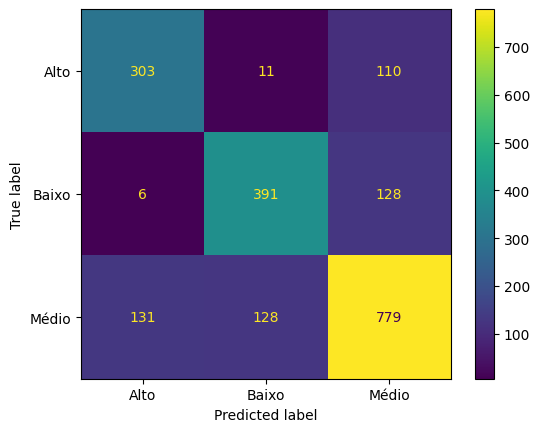

In [ ]:
DT_base = DecisionTreeClassifier(random_state=42)
train_eval(DT_base, X_train, y_train, X_test, y_test)

### Logistic Regression

Accuracy: 0.7317564167086059


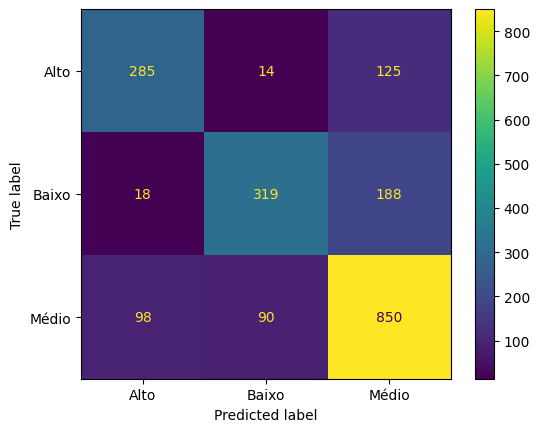

In [ ]:
LR_base = LogisticRegression(multi_class = 'ovr', solver = 'liblinear', random_state = 42)
train_eval(LR_base, X_train, y_train, X_test, y_test)

### Random Forest

Accuracy: 0.7996980372420734


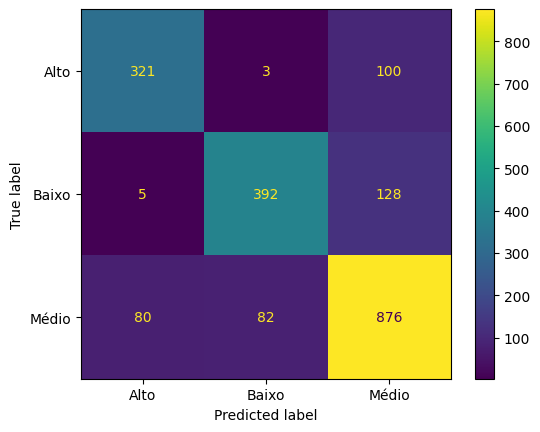

In [ ]:
RFC_base = RandomForestClassifier(random_state = 42)
train_eval(RFC_base, X_train, y_train, X_test, y_test)

## Feature Selection

In [ ]:
def make_selector(estimator, X, y):
  selector = RFECV(estimator)
  selector.fit(X, y)
  return selector

### Decision Tree

Selected features for Decision Tree:
['listing.usableAreas' 'listing.unitsOnTheFloor' 'listing.unitFloor'
 'listing.parkingSpaces' 'listing.suites' 'listing.bathrooms'
 'listing.totalAreas' 'listing.bedrooms' 'listing.displayAddressType_ALL'
 'listing.displayAddressType_NEIGHBORHOOD'
 'listing.displayAddressType_STREET' 'listing.unitTypes_ALLOTMENT_LAND'
 'listing.unitTypes_APARTMENT' 'listing.unitTypes_HOME'
 'listing.unitTypes_RESIDENTIAL_ALLOTMENT_LAND'
 'listing.address.level_CITY' 'listing.address.level_STREET'
 'listing.address.precision_GEOMETRIC_CENTER'
 'listing.address.precision_RANGE_INTERPOLATED'
 'listing.address.precision_ROOFTOP' 'listing.address.zone_Bairros'
 'listing.address.zone_Zona Oeste' 'listing.address.zone_Zona Sul'
 'listing.address.state_Amazonas' 'listing.address.state_Bahia'
 'listing.address.state_Ceará' 'listing.address.state_Distrito Federal'
 'listing.address.state_Goiás' 'listing.address.state_Maranhão'
 'listing.address.state_Minas Gerais' 'listing.ad

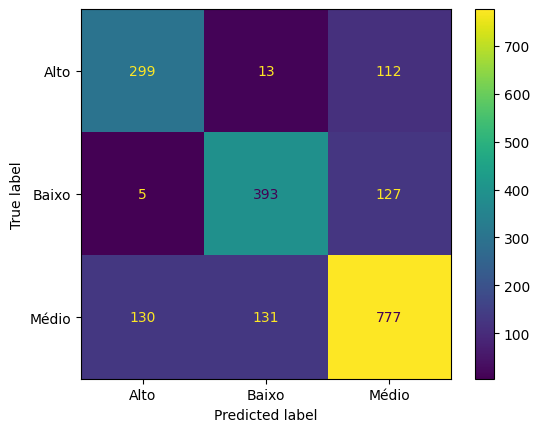

In [ ]:
selector_DT = make_selector(DT_base, X_train, y_train)
X_train_DT = selector_DT.transform(X_train)
X_test_DT = selector_DT.transform(X_test)
print(f'Selected features for Decision Tree:\n{X_train.columns[selector_DT.get_support()].values}')
train_eval(DT_base, X_train_DT, y_train, X_test_DT, y_test)

### Logistic Regression

Selected features for Logistic Regression:
['listing.usableAreas' 'listing.unitsOnTheFloor' 'listing.parkingSpaces'
 'listing.suites' 'listing.bathrooms' 'listing.totalAreas'
 'listing.bedrooms' 'listing.displayAddressType_ALL'
 'listing.displayAddressType_NEIGHBORHOOD'
 'listing.displayAddressType_STREET' 'listing.unitTypes_ALLOTMENT_LAND'
 'listing.unitTypes_APARTMENT' 'listing.unitTypes_BUILDING'
 'listing.unitTypes_BUSINESS'
 'listing.unitTypes_COMMERCIAL_ALLOTMENT_LAND'
 'listing.unitTypes_COMMERCIAL_BUILDING'
 'listing.unitTypes_COMMERCIAL_PROPERTY' 'listing.unitTypes_CONDOMINIUM'
 'listing.unitTypes_COUNTRY_HOUSE' 'listing.unitTypes_FARM'
 'listing.unitTypes_FLAT' 'listing.unitTypes_HOME'
 'listing.unitTypes_KITNET' 'listing.unitTypes_OFFICE'
 'listing.unitTypes_PENTHOUSE'
 'listing.unitTypes_RESIDENTIAL_ALLOTMENT_LAND'
 'listing.unitTypes_RESIDENTIAL_BUILDING'
 'listing.unitTypes_SHED_DEPOSIT_WAREHOUSE'
 'listing.unitTypes_TWO_STORY_HOUSE' 'listing.unitTypes_VILLAGE_HOUSE'
 'li

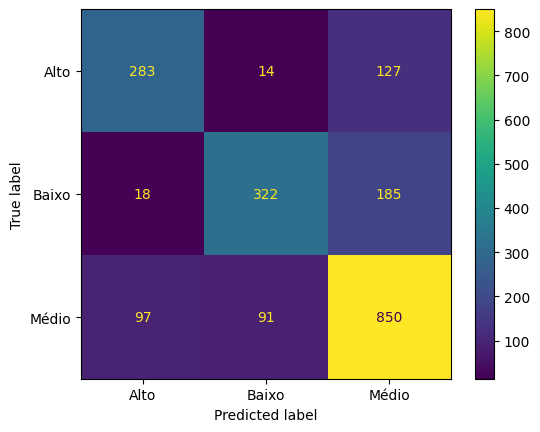

In [ ]:
selector_LR = make_selector(LR_base, X_train, y_train)
X_train_LR = selector_LR.transform(X_train)
X_test_LR = selector_LR.transform(X_test)
print(f'Selected features for Logistic Regression:\n{X_train.columns[selector_LR.get_support()].values}')
train_eval(LR_base, X_train_LR, y_train, X_test_LR, y_test)

### Random Forest

Selected features for Random Forest:
['listing.usableAreas' 'listing.unitsOnTheFloor' 'listing.unitFloor'
 'listing.parkingSpaces' 'listing.suites' 'listing.bathrooms'
 'listing.totalAreas' 'listing.bedrooms' 'listing.displayAddressType_ALL'
 'listing.displayAddressType_NEIGHBORHOOD'
 'listing.displayAddressType_STREET' 'listing.unitTypes_ALLOTMENT_LAND'
 'listing.unitTypes_APARTMENT' 'listing.unitTypes_COMMERCIAL_PROPERTY'
 'listing.unitTypes_CONDOMINIUM' 'listing.unitTypes_HOME'
 'listing.unitTypes_OFFICE' 'listing.unitTypes_PENTHOUSE'
 'listing.unitTypes_RESIDENTIAL_ALLOTMENT_LAND' 'listing.portal_GRUPOZAP'
 'listing.portal_ZAP' 'listing.address.level_CITY'
 'listing.address.level_NEIGHBORHOOD' 'listing.address.level_STREET'
 'listing.address.precision_APPROXIMATE'
 'listing.address.precision_GEOMETRIC_CENTER'
 'listing.address.precision_Precision_NONE'
 'listing.address.precision_RANGE_INTERPOLATED'
 'listing.address.precision_ROOFTOP' 'listing.address.zone_Bairros'
 'listing.addre

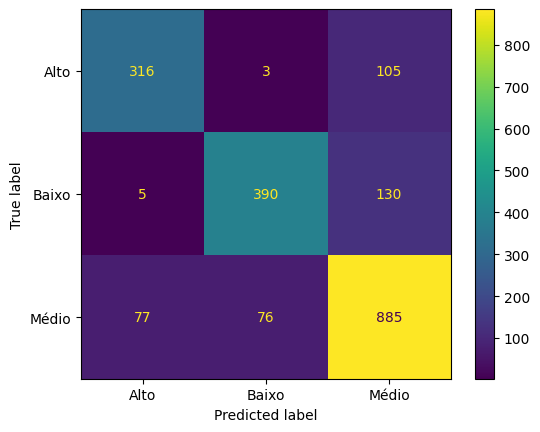

In [ ]:
selector_RFC = make_selector(RFC_base, X_train, y_train)
X_train_RFC = selector_RFC.transform(X_train)
X_test_RFC = selector_RFC.transform(X_test)
print(f'Selected features for Random Forest:\n{X_train.columns[selector_RFC.get_support()].values}')
train_eval(RFC_base, X_train_RFC, y_train, X_test_RFC, y_test)